<a href="https://colab.research.google.com/github/yash-1994/Seeds-Ml-Unsupervised-Model-fcc-learning-3/blob/main/Seeds_Ml_Unsupervised_Model_fcc_learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
cols = ["area","perimeter","compactness","length","width","asymmetry","groove","class"]

data = pd.read_csv('https://raw.githubusercontent.com/yash-1994/Seeds-Ml-Unsupervised-Model-fcc-learning-3/refs/heads/main/seeds_dataset.txt',sep="\s+",names=cols)
data.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


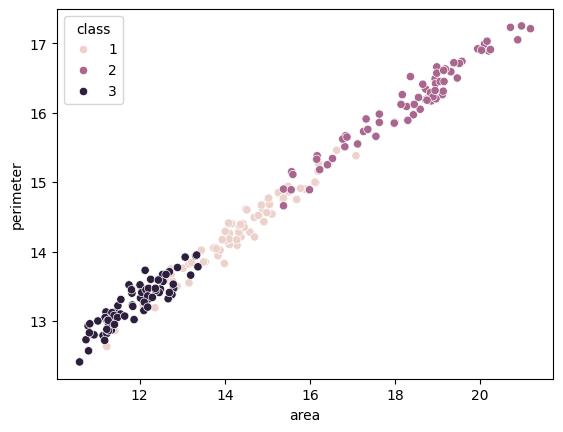

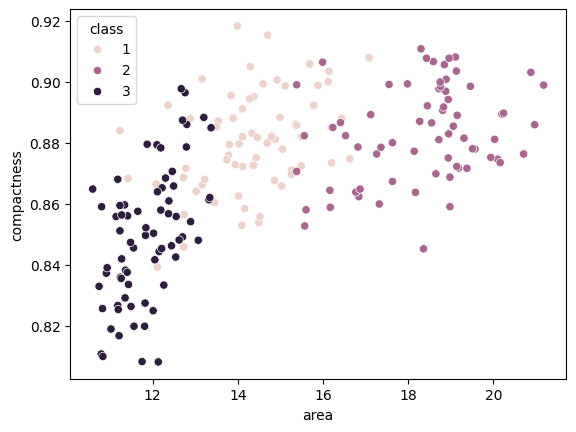

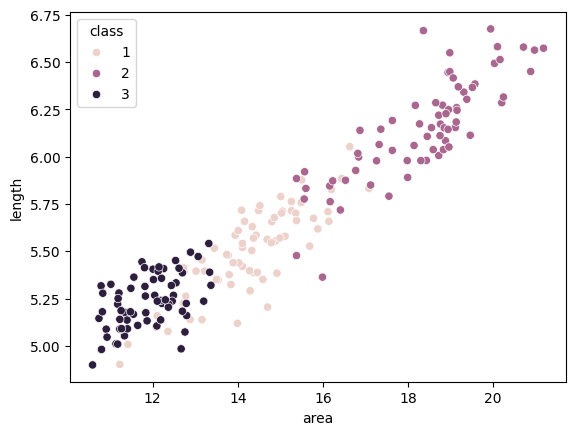

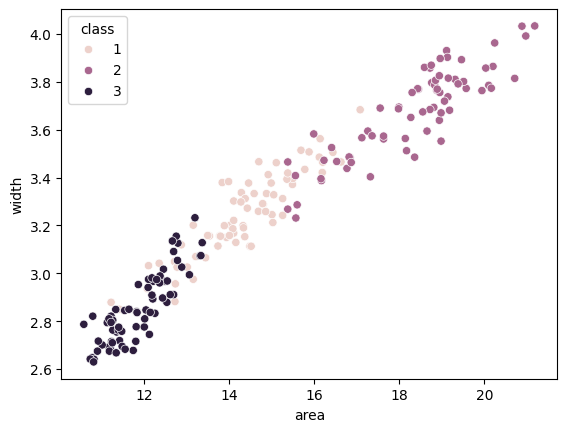

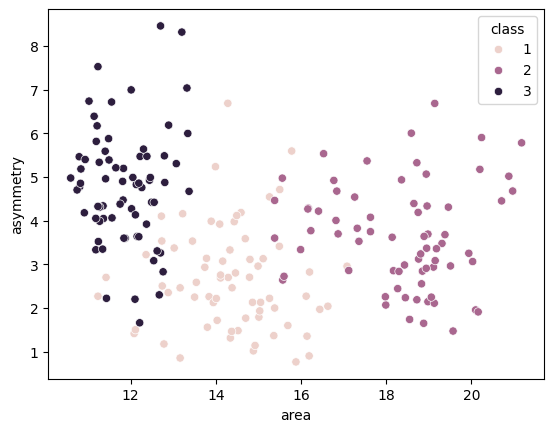

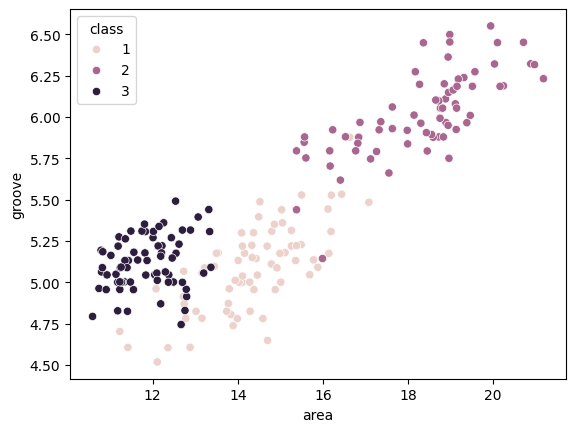

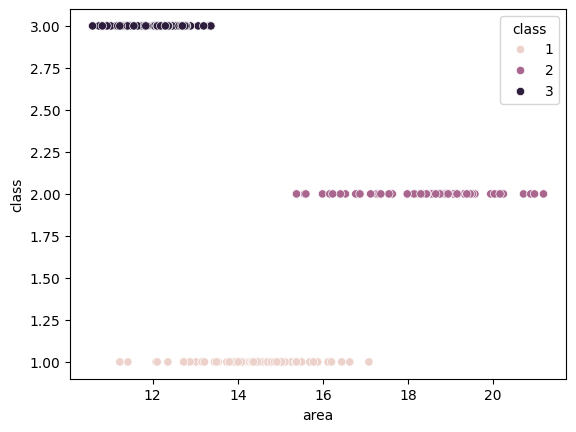

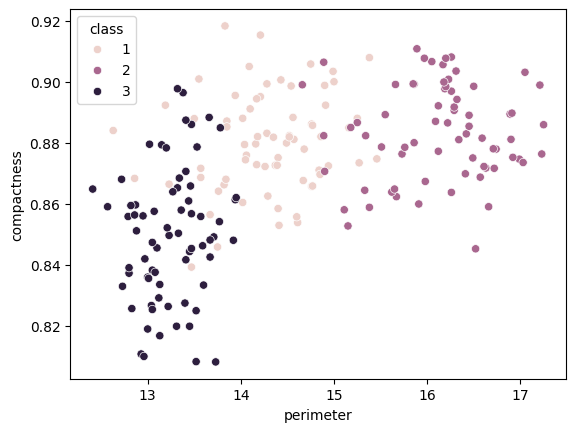

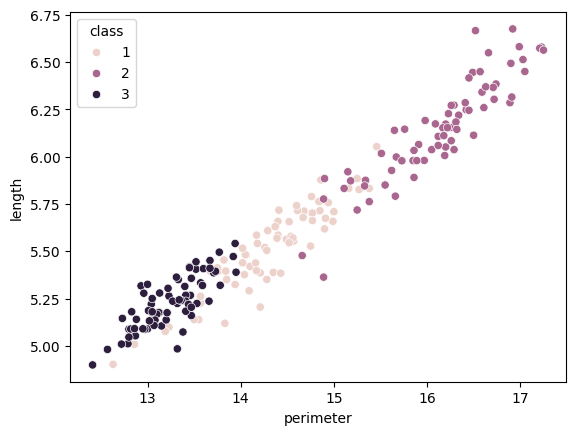

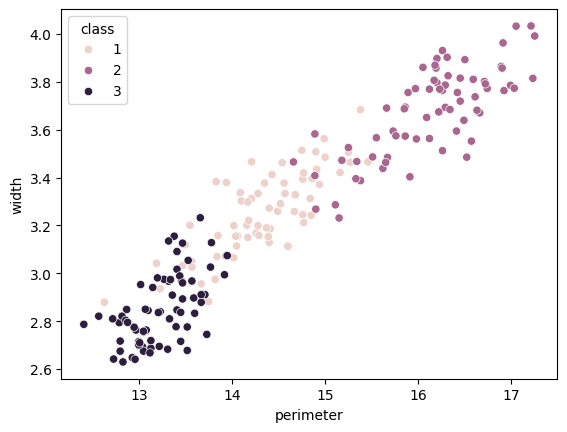

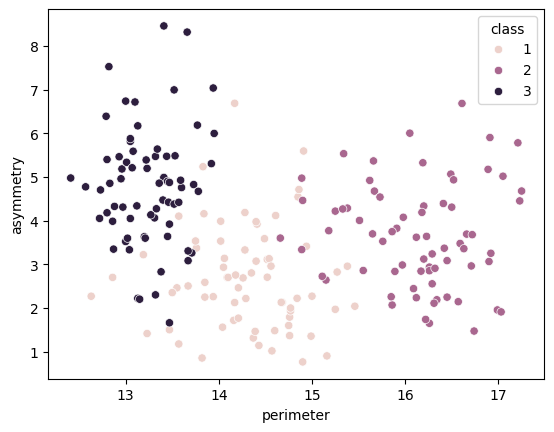

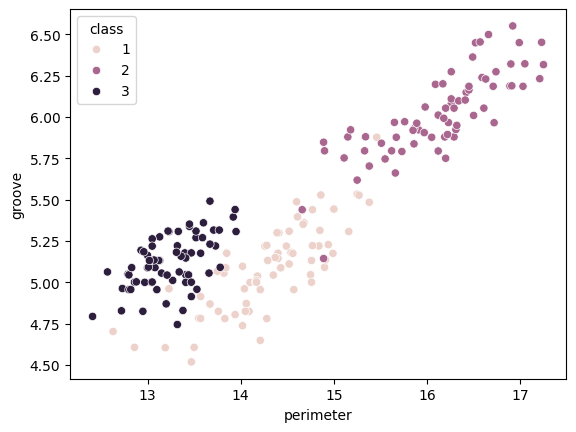

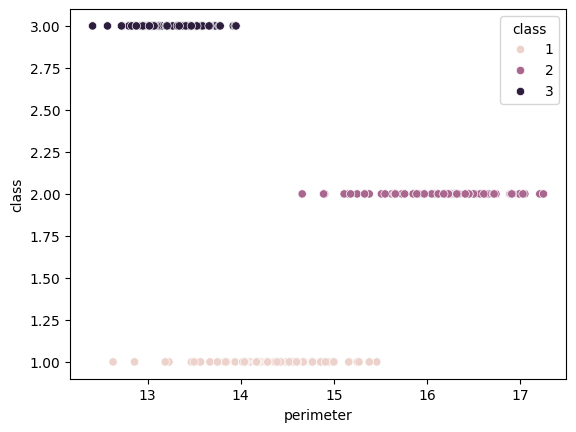

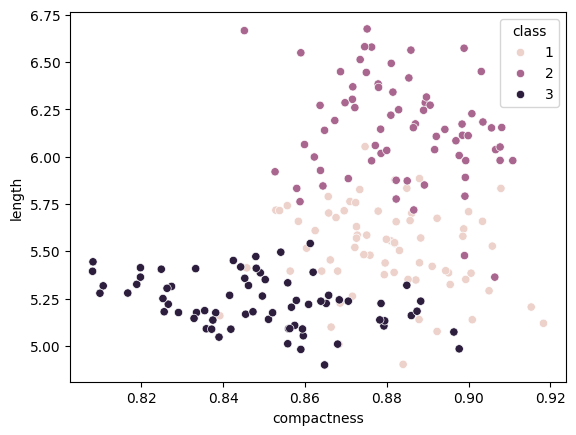

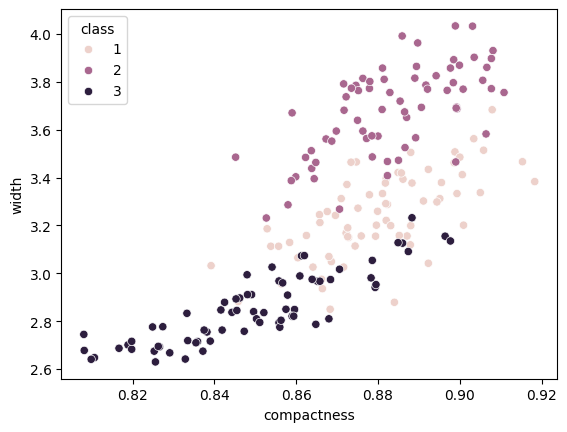

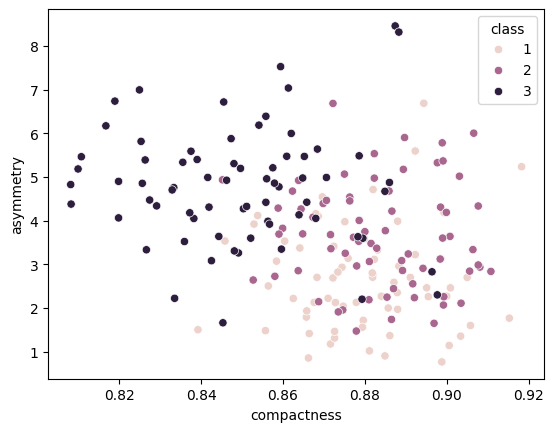

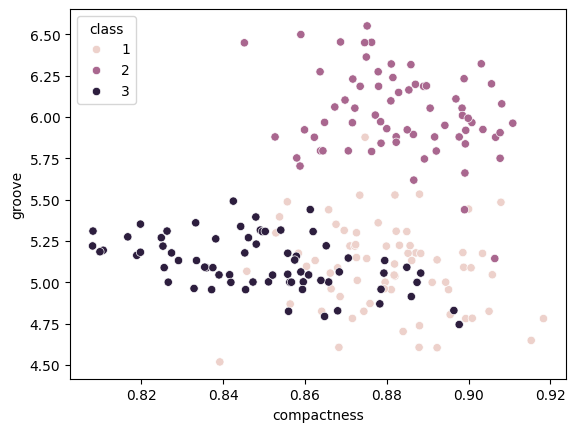

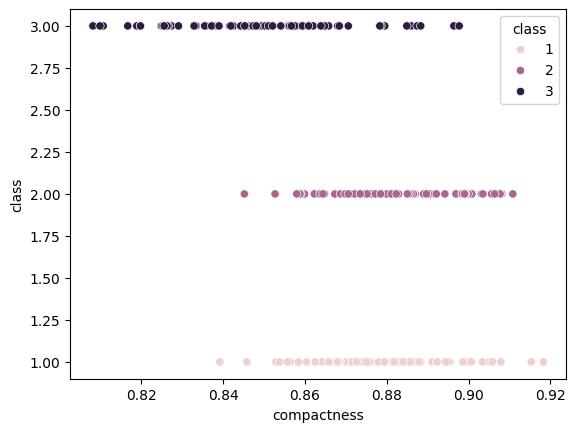

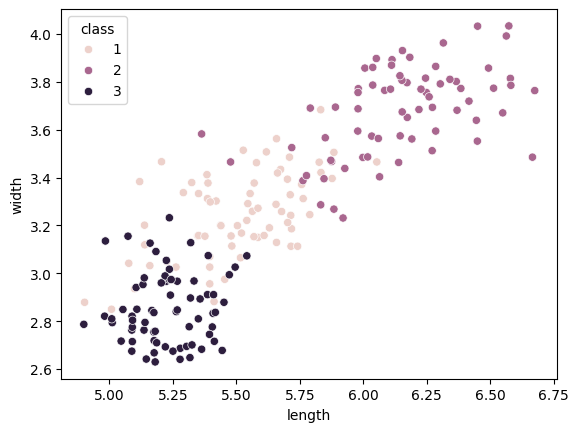

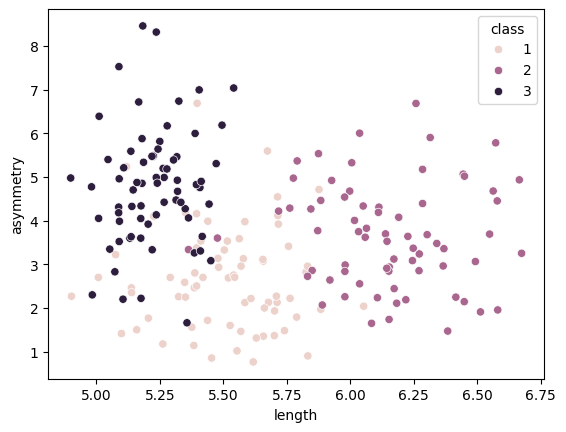

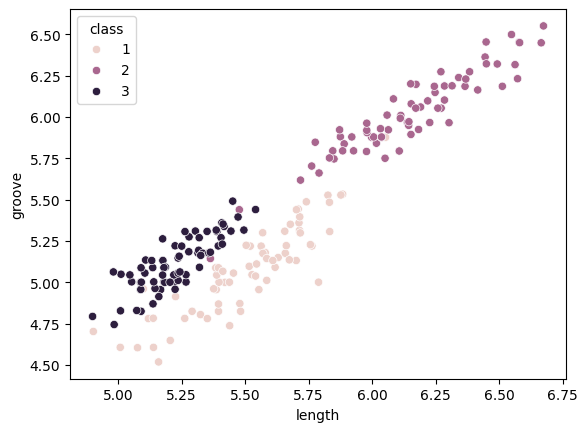

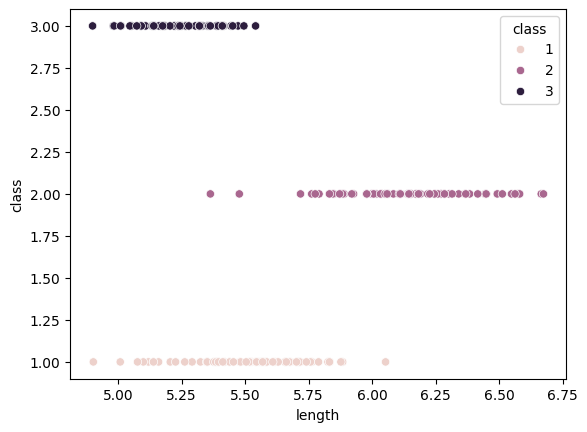

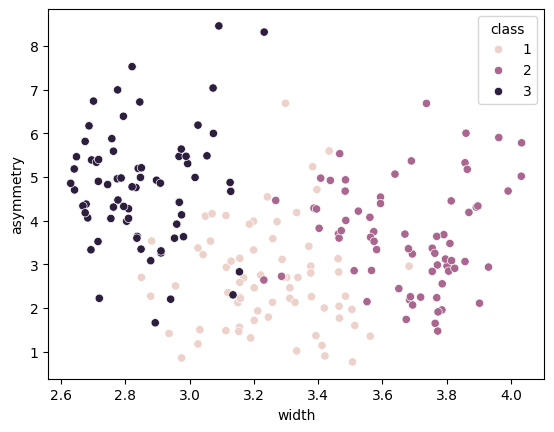

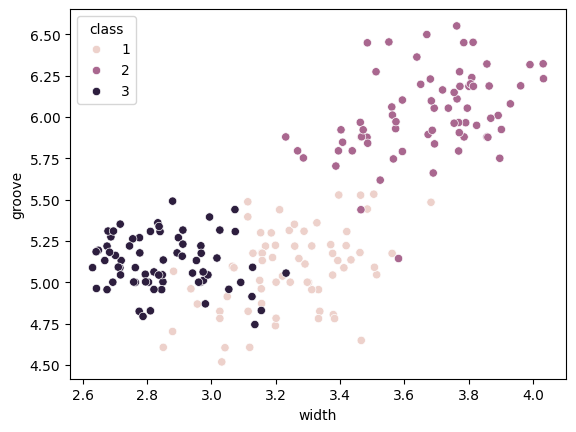

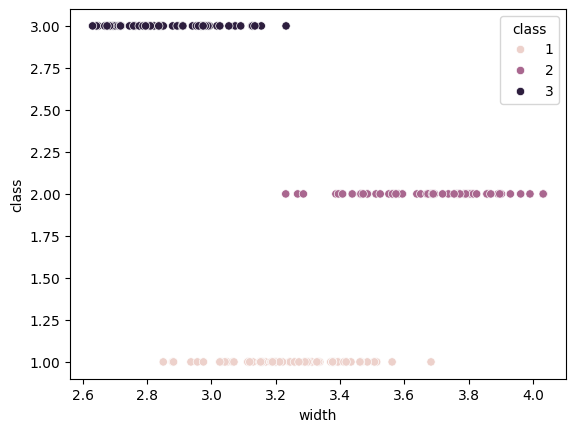

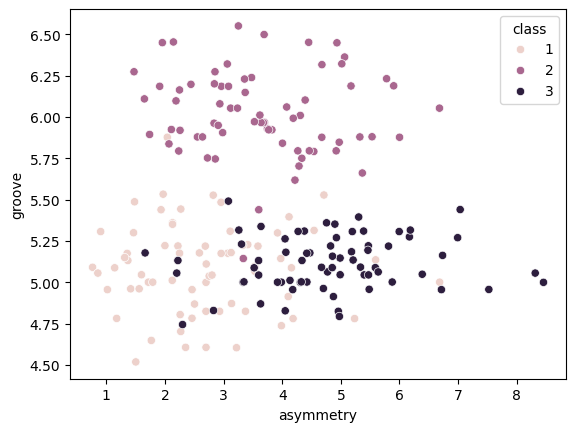

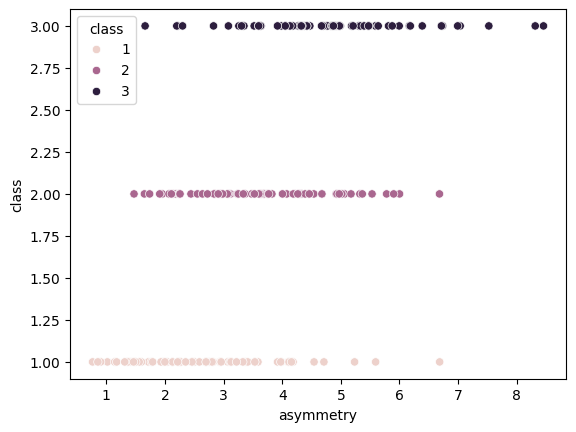

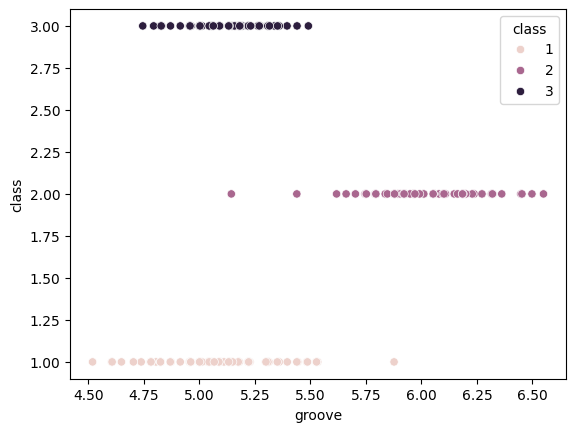

In [ ]:
for i in range(len(cols)-1):
  for j in range(i+1,len(cols)):
    x_label = data[cols[i]]
    y_label = data[cols[j]]
    sns.scatterplot(x=x_label,y=y_label,data=data,hue="class")
    plt.show()
    print()

# Clusting

In [ ]:
x = "perimeter"
y = "asymmetry"
dt = data[[x,y]].values
data.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
kmeans_model = KMeans(n_clusters=3).fit(dt)
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Before custring


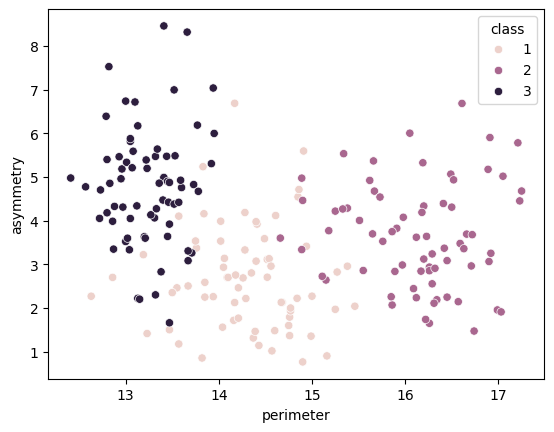

After custring


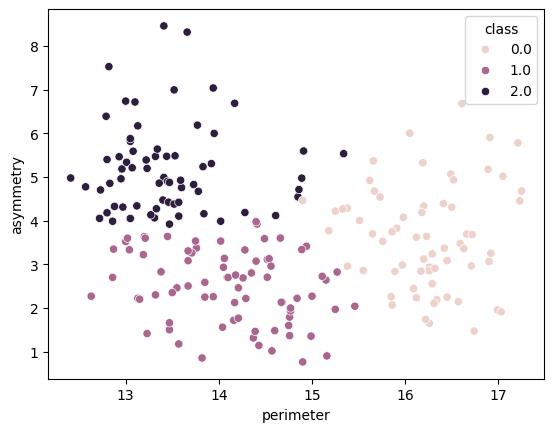

In [ ]:
clus = kmeans_model.labels_
cl_df = pd.DataFrame(np.hstack((dt,clus.reshape(-1,1))),columns=[x,y,"class"])
print("Before custring")
sns.scatterplot(x=data[x],y=data[y],data=data,hue="class")
plt.show()
print("After custring")
sns.scatterplot(x=cl_df[x],y=cl_df[y],data=cl_df,hue="class")
plt.show()


# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
x = data[:-1].values
tran_x = pca.fit_transform(x)


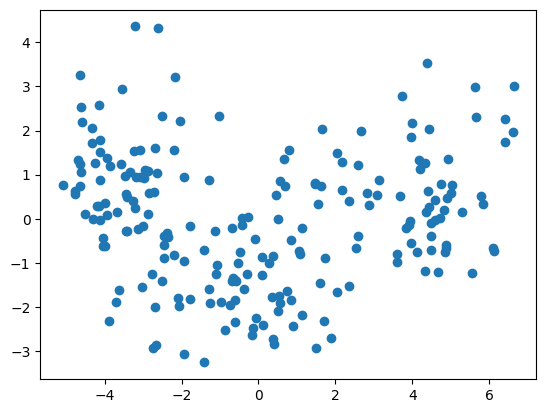

In [ ]:
plt.scatter(tran_x[:,0],tran_x[:,1])
plt.show()

In [ ]:
pca_df = pd.DataFrame(tran_x,columns=["PC1","PC2"])
pca_df["class"] = kmeans_model.labels_[:-1]
truth_df = pd.DataFrame(tran_x,columns=["PC1","PC2"])
truth_df["class"] = data["class"]

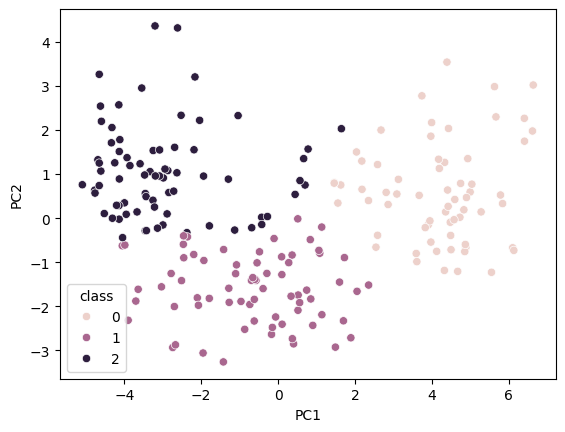

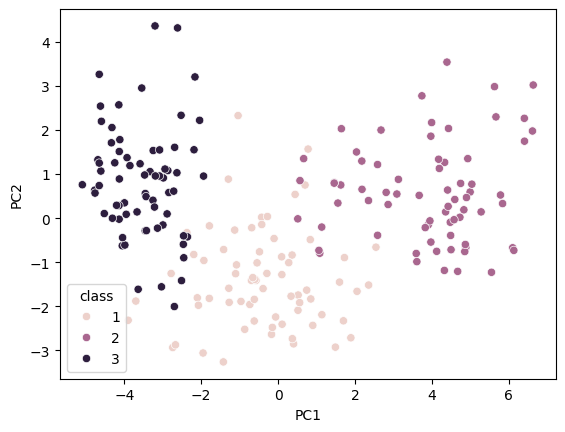

In [ ]:
sns.scatterplot(x=pca_df["PC1"],y=pca_df["PC2"],data=pca_df,hue="class")
plt.show()
print("")
sns.scatterplot(x=truth_df["PC1"],y=truth_df["PC2"],data=truth_df,hue="class")
plt.show()